# Lab 4: Hough Transform for Line and Circle Detection Using OpenCV 

In [106]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

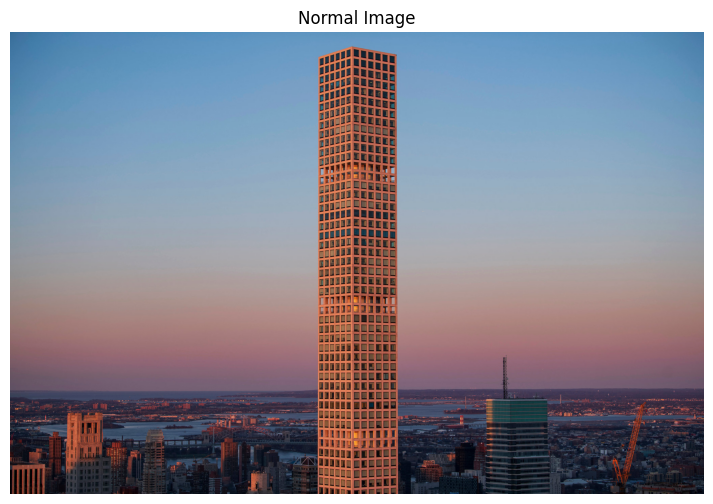

In [107]:
image = cv2.imread('bulding.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#  Display image using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(gray)
plt.axis('off')
plt.title('Normal Image')
plt.show()

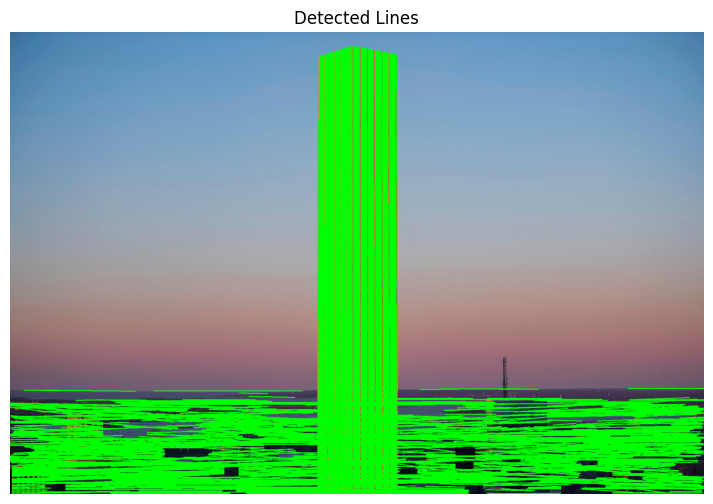

In [108]:
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
# Apply Probabilistic Hough Line Transform with new parameters
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=150, minLineLength=50, maxLineGap=40)

# Draw detected lines
output = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines

# Convert BGR to RGB for correct Matplotlib display
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Show the result
plt.figure(figsize=(10, 6))
plt.imshow(output_rgb)
plt.axis('off')
plt.title('Detected Lines')
plt.show()

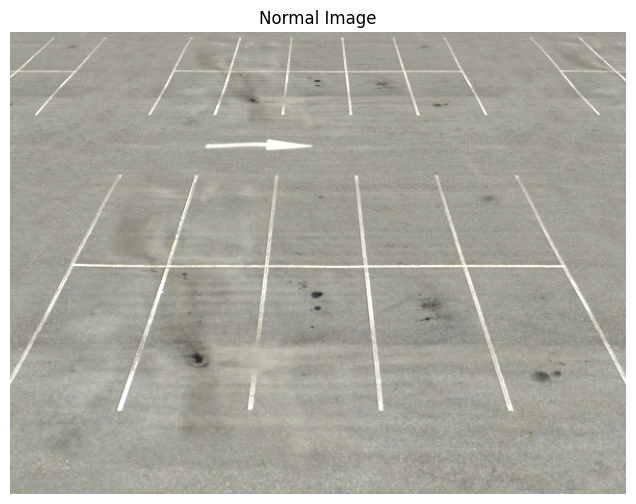

In [109]:
image = cv2.imread('parkinglot.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#  Display image using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(gray)
plt.axis('off')
plt.title('Normal Image')
plt.show()

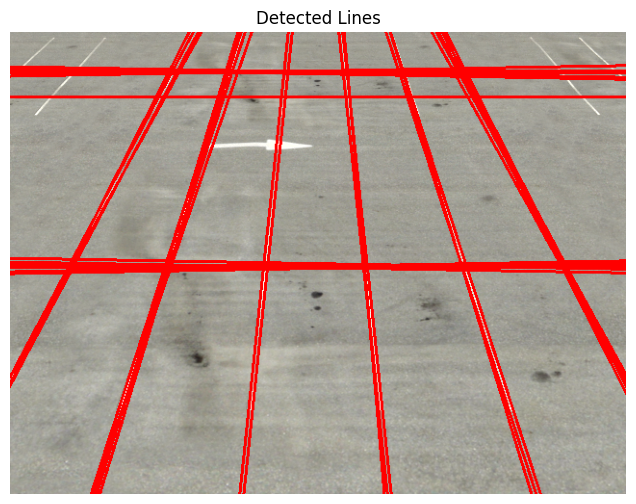

In [110]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect edges using Canny
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Draw detected lines
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Convert BGR to RGB for correct colors in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display image using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Detected Lines')
plt.show()

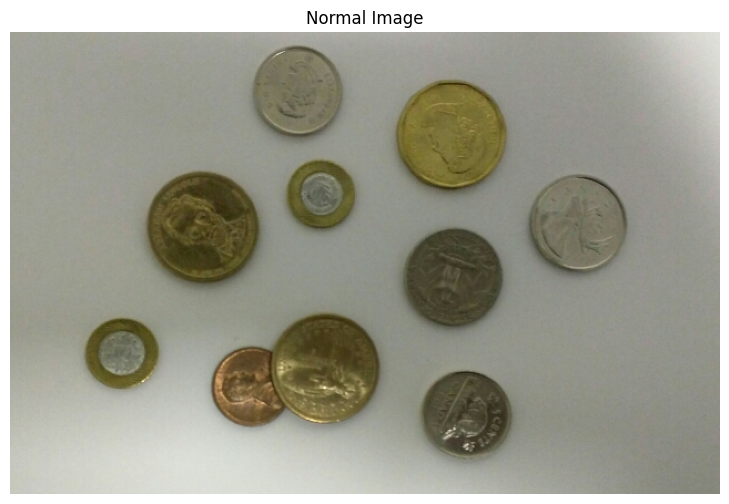

In [111]:
image = cv2.imread("circle.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#  Display image using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(gray)
plt.axis('off')
plt.title('Normal Image')
plt.show()

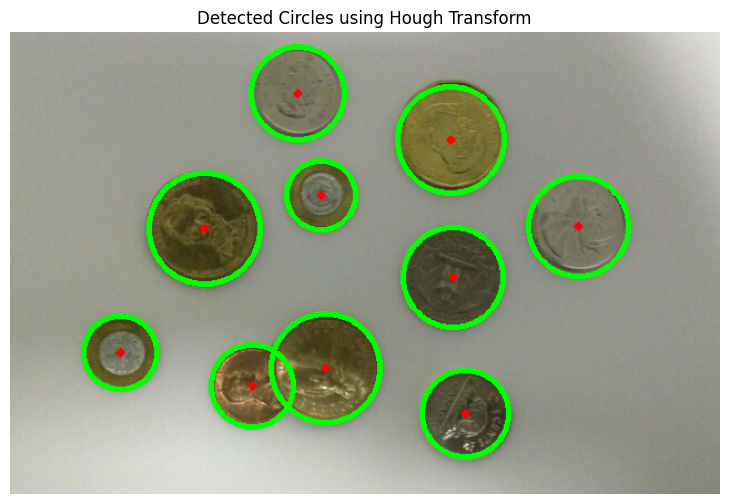

In [112]:
# Load the image
image = cv2.imread("circle.jpg")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve detection
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    blurred, 
    cv2.HOUGH_GRADIENT, 
    dp=1.2, 
    minDist=30, 
    param1=50, 
    param2=30, 
    minRadius=10, 
    maxRadius=100
)

# Draw detected circles
output = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))  # Convert to integer values
    for i in circles[0, :]:
        cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 3)  # Draw circle (Green)
        cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)  # Draw center (Red)

# Convert BGR to RGB for correct visualization in Matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Show the result
plt.figure(figsize=(10, 6))
plt.imshow(output_rgb)
plt.axis('off')
plt.title('Detected Circles using Hough Transform')
plt.show()